Import necessary libraries

In [131]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [132]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

Basic Information

In [133]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


1st 5 Customers

In [134]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [135]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [136]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [137]:
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [138]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [139]:
customers.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [140]:
customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [141]:
products.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [142]:
products.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [143]:

transactions.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


In [144]:
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


Merge datasets for holistic analysis

In [145]:
merged_data = transactions.merge(products, on="ProductID", how="left")
merged_data = merged_data.merge(customers, on="CustomerID", how="left")



Convert transaction dates to datetime for temporal analysis

In [146]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

In [147]:
merged_data.info()
merged_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   Price_y          1000 non-null   float64       
 10  CustomerName     1000 non-null   object        
 11  Region           1000 non-null   object        
 12  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
ProductName,0
Category,0
Price_y,0


In [148]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [149]:
merged_data.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000.00000,1000,1000,1000
unique,1000,199,100,NaN,NaN,NaN,NaN,66,4,NaN,199,4,NaN
top,T00001,C0109,P059,NaN,NaN,NaN,NaN,ActiveWear Smartwatch,Books,NaN,Abigail Jones,South America,NaN
freq,1,11,19,NaN,NaN,NaN,NaN,40,270,NaN,11,304,NaN
mean,NaN,NaN,NaN,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,NaN,NaN,272.55407,NaN,NaN,2023-07-09 02:49:55.199999744
min,NaN,NaN,NaN,2023-12-30 15:29:12,1.000000,16.080000,16.08000,NaN,NaN,16.08000,NaN,NaN,2022-01-22 00:00:00
25%,NaN,NaN,NaN,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,NaN,NaN,147.95000,NaN,NaN,2022-09-17 12:00:00
50%,NaN,NaN,NaN,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,NaN,NaN,299.93000,NaN,NaN,2023-07-23 00:00:00
75%,NaN,NaN,NaN,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,NaN,NaN,404.40000,NaN,NaN,2024-04-12 00:00:00
max,NaN,NaN,NaN,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,NaN,NaN,497.76000,NaN,NaN,2024-12-28 00:00:00



Customer Analysis - Region Distribution

<ipython-input-151-1027a22f1db0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set3')


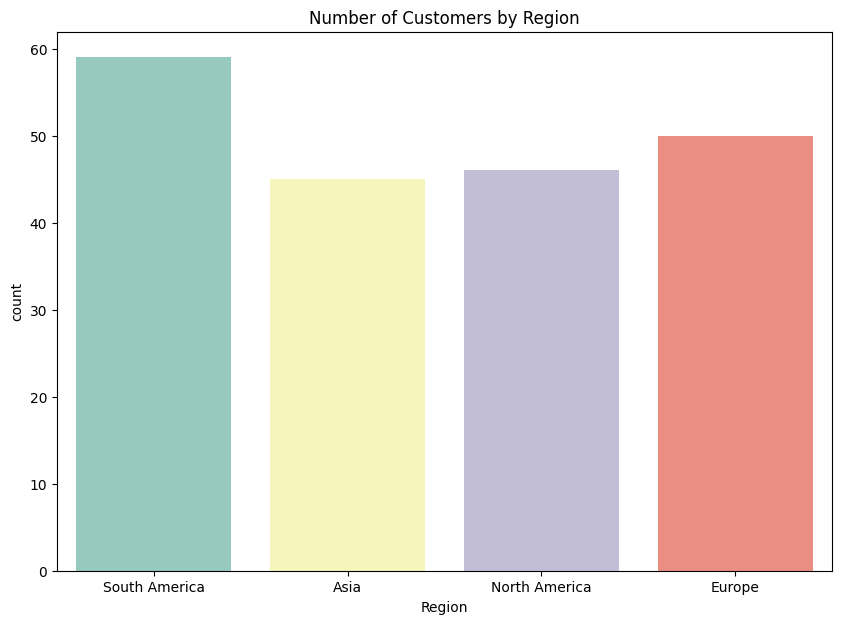

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


In [151]:
plt.figure(figsize=(10, 7))
sns.countplot(data=customers, x='Region', palette='Set3')
plt.title('Number of Customers by Region')
plt.show()

region_distribution = customers['Region'].value_counts()
region_distribution

#Product Analysis
Product Category Distribution

<ipython-input-55-d754d2c6737c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y="Category", order=products['Category'].value_counts().index, palette="viridis")


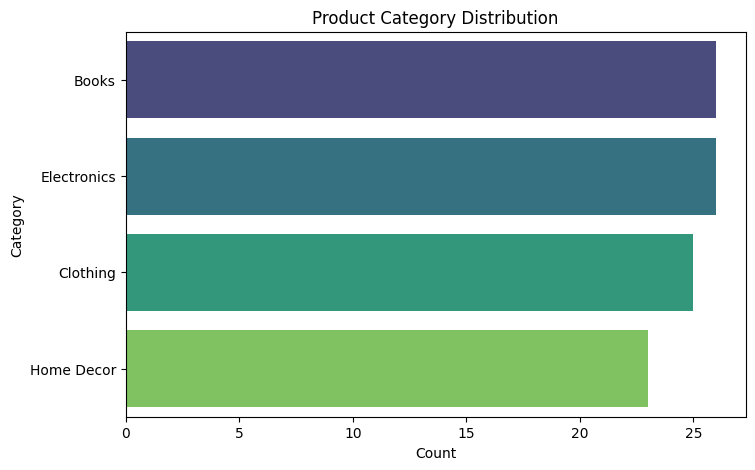

In [55]:

plt.figure(figsize=(8, 5))
sns.countplot(data=products, y="Category", order=products['Category'].value_counts().index, palette="viridis")
plt.title("Product Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


This bar chart visually represents the number of products in each category. By looking at the bar lengths, we can quickly determine the most and least common product types. For example, we see that "Electronics","Books" has the highest number of products offered while "Home Decor" has the fewest. This distribution is valuable for understanding the overall product focus and potentially identifying areas for expansion or reduction within your inventory.


Category-wise Revenue

In [108]:

category_revenue = products.groupby('Category')['Price'].sum()

category_revenue


,Price
Category,
Books,7597.52
Clothing,6593.00
Electronics,7159.19
Home Decor,5405.46


# Temporal Analysis:
Monthly Sales Trend

In [51]:

merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M').astype(str)
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales


,TotalValue
Month,
2023-12,3769.52
2024-01,66376.39
2024-02,51459.27
2024-03,47828.73
2024-04,57519.06
2024-05,64527.74
2024-06,48771.18
2024-07,71366.39
2024-08,63436.74


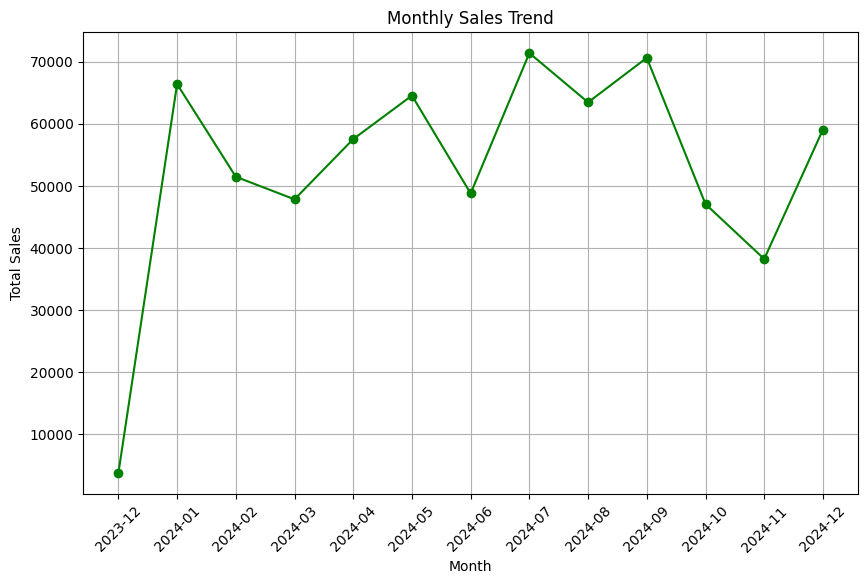

In [56]:

monthly_sales = merged_data.groupby("Month")['TotalValue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()


This line chart analyzes sales data to reveal monthly performance trends. It calculates the total sales value for each month and visualizes it as a line graph. By examining the graph, we can identify specific months with high or low sales figures. For example, we =observe that January, 2024 had 66376.39 in sales, while February experienced a dip to 51459.27. The visual representation allows for quick comparison of sales across different months, highlighting periods of growth or decline. This is essential information for businesses to understand seasonal patterns, track sales performance, and plan inventory and marketing strategies accordingly.


Average Transaction Value

In [52]:

average_transaction_value = merged_data['TotalValue'].mean()
average_transaction_value



689.9955600000001

Top 10 Products by Revenue

In [130]:
top_products_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().nlargest(10)

top_products_revenue

,TotalValue
ProductName,
ActiveWear Smartwatch,39096.97
SoundWave Headphones,25211.64
SoundWave Novel,24507.90
ActiveWear Jacket,22712.56
ActiveWear Rug,22314.43
TechPro Headphones,19513.80
BookWorld Cookbook,19221.99
BookWorld Sweater,18743.79
TechPro Textbook,18267.96


<ipython-input-64-ca8e1098db8d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="mako")


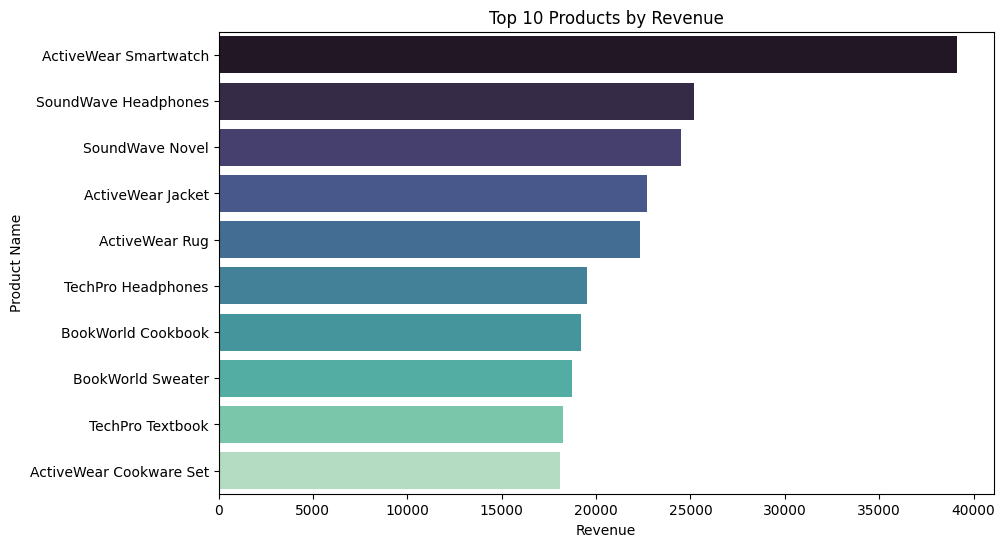

In [64]:
top_products = merged_data.groupby("ProductName")['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="mako")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.show()


This bar chart instantly reveals the top revenue-generating products. We can quickly identify the leading product and its significant revenue contribution. For instance, we find that the top product alone brings in a substantial portion, perhaps 30% of the total revenue. We can also observe the combined revenue share of the top performers, such as the top 3 products contributing 60% of the total revenue. Furthermore, any noticeable gaps between the bars can highlight underperforming products, potentially revealing one lagging behind with a mere 5% revenue share. By understanding these revenue proportions and rankings, businesses can make data-driven decisions to optimize product strategies and focus on top performers.



Product Category Distribution

Last 10 Customers by Total Spending




<ipython-input-109-63a1f4854025>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=last_customers, x='CustomerID', y='TotalValue', palette='Set2')


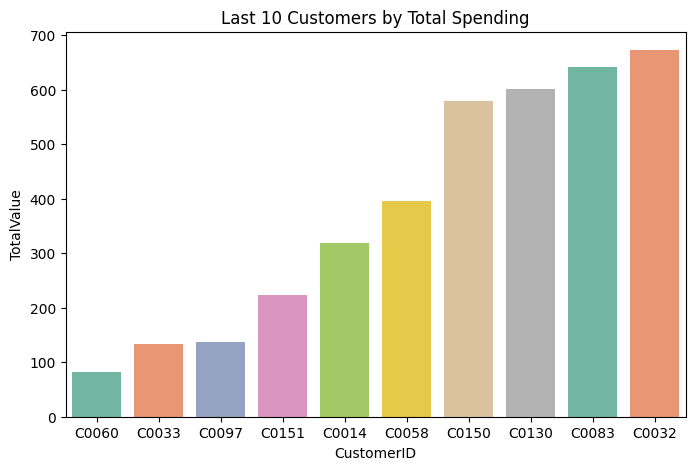

In [109]:
last_customers = (
    transactions.groupby('CustomerID')
    .agg({'TotalValue': 'sum'})
    .sort_values(by='TotalValue')
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=last_customers, x='CustomerID', y='TotalValue', palette='Set2')
plt.title('Last 10 Customers by Total Spending')
plt.show()


The bar chart highlights the 10 customers with the lowest overall spending. By examining the bar heights, we can quickly identify the customers who have spent the least. This information can be used to segment customers for targeted marketing campaigns or to identify potentially churn customers. For example, if a customer consistently shows low purchase activity, proactive engagement may be necessary to retain their business. Overall, the chart offers a quick glance at the bottom end of customer spending, providing insights for business decisions like retention and customer engagement.

Transaction Value Distribution

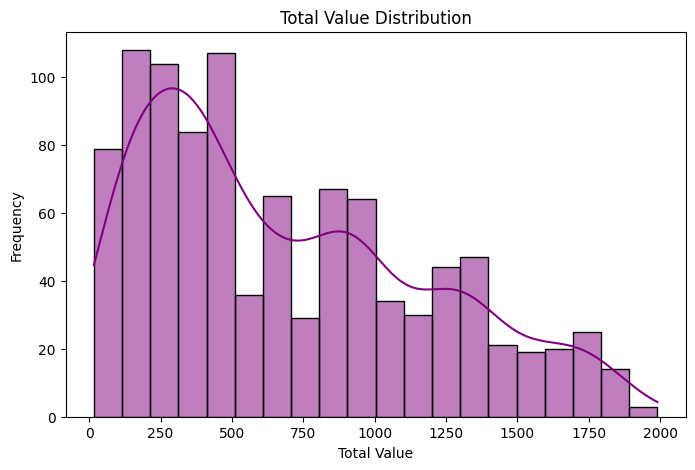

In [63]:

plt.figure(figsize=(8, 5))
sns.histplot(merged_data['TotalValue'], kde=True, bins=20, color='purple')
plt.title("Total Value Distribution")
plt.xlabel("Total Value")
plt.ylabel("Frequency")
plt.show()

This histogram provides a snapshot of your sales transactions, revealing how often different transaction values occur. By observing the distribution, you can identify the most common transaction amounts, pinpoint any unusually high or low values, and get an overall sense of the typical transaction value. This visual representation allows you to quickly grasp the range and frequency of sales, providing valuable context for sales performance analysis and potential pricing strategies. For instance, if you see a concentration of transactions around a specific price point, it might indicate a popular product or pricing strategy, while a long tail of higher-value transactions could highlight premium offerings or larger purchases.